# Initialization

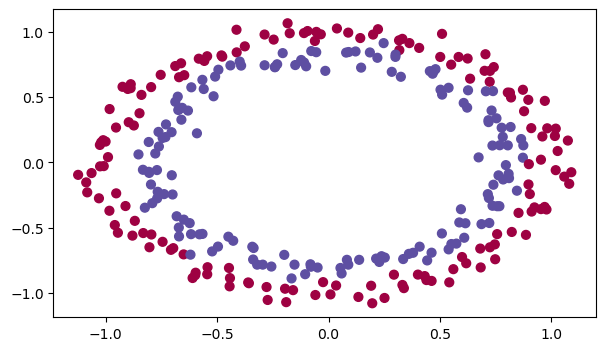

In [5]:
# Necessary imports
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets
from init_utils import (
    sigmoid, relu, compute_loss, forward_propagation, backward_propagation, 
    update_parameters, predict, load_dataset, plot_decision_boundary, predict_dec
)

# Set inline plotting for Jupyter Notebook and adjust plot appearance
%matplotlib inline
plt.rcParams['figure.figsize'] = (7.0, 4.0)  # Default figure size for plots
plt.rcParams['image.interpolation'] = 'nearest'  # Smoother image display
plt.rcParams['image.cmap'] = 'gray'  # Default color map for images

# Load the dataset (blue/red dots in circles, commonly used for classification tasks)
train_X, train_Y, test_X, test_Y = load_dataset()

# Dataset description:
# - train_X: Input features for training, shape (n_features, n_samples)
# - train_Y: Corresponding labels for training data, shape (1, n_samples)
# - test_X: Input features for testing, shape (n_features, n_samples)
# - test_Y: Corresponding labels for testing data, shape (1, n_samples)


## 1 - Neural Network model

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def model(X, Y, learning_rate=0.01, num_iterations=15000, print_cost=True, initialization="he"):
    """
    Implements a three-layer neural network: LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID.
    
    Arguments:
    X -- input data, shape (n_features, n_examples)
    Y -- true label vector, shape (1, n_examples), with 0 for red dots and 1 for blue dots
    learning_rate -- learning rate for gradient descent optimization (default: 0.01)
    num_iterations -- number of iterations to run gradient descent (default: 15,000)
    print_cost -- whether to print the cost every 1000 iterations (default: True)
    initialization -- method for weight initialization: "zeros", "random", or "he" (default: "he")
    
    Returns:
    parameters -- learned parameters of the model
    """
    
    costs = []  # Store the cost after every 1000 iterations
    m = X.shape[1]  # Number of training examples
    layers_dims = [X.shape[0], 10, 5, 1]  # Define the architecture: input -> 2 hidden layers -> output
    
    # Initialize parameters based on the chosen initialization method
    if initialization == "zeros":
        parameters = initialize_parameters_zeros(layers_dims)
    elif initialization == "random":
        parameters = initialize_parameters_random(layers_dims)
    elif initialization == "he":
        parameters = initialize_parameters_he(layers_dims)

    # Gradient descent loop
    for i in range(num_iterations):
        
        # Forward propagation: LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID
        a3, cache = forward_propagation(X, parameters)
        
        # Compute cost
        cost = compute_loss(a3, Y)
        
        # Backward propagation to compute gradients
        grads = backward_propagation(X, Y, cache)
        
        # Update parameters using the gradients
        parameters = update_parameters(parameters, grads, learning_rate)
        
        # Print the cost every 1000 iterations and append to cost list
        if print_cost and i % 1000 == 0:
            print(f"Cost after iteration {i}: {cost:.6f}")
            costs.append(cost)
    
    # Plot the cost function to show learning progress
    plt.plot(costs)
    plt.ylabel('Cost')
    plt.xlabel('Iterations (x1000)')
    plt.title(f"Learning rate = {learning_rate}")
    plt.show()
    
    return parameters


## 2 - Zero initialization

In [9]:
def initialize_parameters_zeros(layers_dims):
    """
    Initialize the parameters of a neural network with zeros.

    Arguments:
    layers_dims -- List containing the size of each layer in the network.

    Returns:
    parameters -- Dictionary containing initialized weight matrices (W) and bias vectors (b).
                  W[l] -- weight matrix of shape (layers_dims[l], layers_dims[l-1])
                  b[l] -- bias vector of shape (layers_dims[l], 1)
    """
    parameters = {}
    L = len(layers_dims)  # Number of layers in the network

    # Initialize weights and biases for each layer
    for l in range(1, L):
        # Initialize weights and biases with zeros
        parameters[f'W{l}'] = np.zeros((layers_dims[l], layers_dims[l-1]))
        parameters[f'b{l}'] = np.zeros((layers_dims[l], 1))

    return parameters


In [10]:
# Initialize parameters with zeros for a network with layer dimensions [3, 2, 1]
parameters = initialize_parameters_zeros([3, 2, 1])

# Print initialized weights and biases
print(f"W1 = {parameters['W1']}")  # Weight matrix for layer 1
print(f"b1 = {parameters['b1']}")  # Bias vector for layer 1
print(f"W2 = {parameters['W2']}")  # Weight matrix for layer 2
print(f"b2 = {parameters['b2']}")  # Bias vector for layer 2


W1 = [[0. 0. 0.]
 [0. 0. 0.]]
b1 = [[0.]
 [0.]]
W2 = [[0. 0.]]
b2 = [[0.]]


Cost after iteration 0: 0.693147
Cost after iteration 1000: 0.693147
Cost after iteration 2000: 0.693147
Cost after iteration 3000: 0.693147
Cost after iteration 4000: 0.693147
Cost after iteration 5000: 0.693147
Cost after iteration 6000: 0.693147
Cost after iteration 7000: 0.693147
Cost after iteration 8000: 0.693147
Cost after iteration 9000: 0.693147
Cost after iteration 10000: 0.693147
Cost after iteration 11000: 0.693147
Cost after iteration 12000: 0.693147
Cost after iteration 13000: 0.693147
Cost after iteration 14000: 0.693147


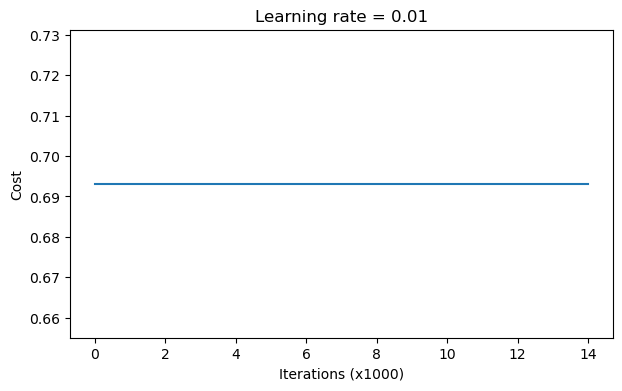

On the train set:
Accuracy: 0.5
On the test set:
Accuracy: 0.5


In [11]:
# Train the model with zero initialization for the parameters
parameters = model(train_X, train_Y, initialization="zeros")

# Evaluate the model on the training set
print("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)

# Evaluate the model on the test set
print("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)


In [12]:
# Output the predictions for the training set
print(f"Predictions on the training set: {predictions_train}")

# Output the predictions for the test set
print(f"Predictions on the test set: {predictions_test}")


Predictions on the training set: [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0]]
Predictions on the test set: [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


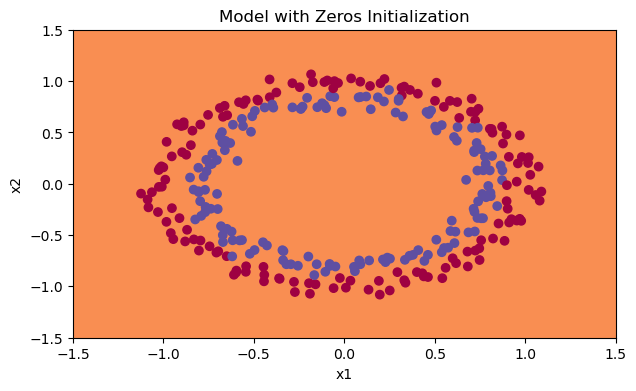

In [13]:
# Set the plot title for the model with zero initialization
plt.title("Model with Zeros Initialization")

# Set the limits for the x and y axes to ensure consistent visualization
plt.xlim([-1.5, 1.5])  # Limit x-axis from -1.5 to 1.5
plt.ylim([-1.5, 1.5])  # Limit y-axis from -1.5 to 1.5

# Plot the decision boundary for the model using the given parameters and training data
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

# Display the plot
plt.show()


## 3 - Random initializations

In [15]:
def initialize_parameters_random(layers_dims):
    """
    Initializes parameters randomly for a neural network with specified layer dimensions.

    Arguments:
    layers_dims -- List containing the size of each layer in the network.

    Returns:
    parameters -- Dictionary containing randomly initialized weights "W1", "b1", ..., "WL", "bL":
                  Wl -- weight matrix of shape (layers_dims[l], layers_dims[l-1])
                  bl -- bias vector of shape (layers_dims[l], 1)
    """

    np.random.seed(3)  # Ensures reproducibility of random numbers for debugging
    parameters = {}
    L = len(layers_dims)  # Number of layers in the network (including input layer)

    for l in range(1, L):
        # Initialize weight matrices with random values scaled by 10
        parameters[f'W{l}'] = np.random.randn(layers_dims[l], layers_dims[l-1]) * 10
        # Initialize bias vectors with zeros
        parameters[f'b{l}'] = np.zeros((layers_dims[l], 1))

    return parameters


In [16]:
# Initialize parameters with a given layer structure
parameters = initialize_parameters_random([3, 2, 1])

# Printing weights and biases for the first layer
print(f"W1 = {parameters['W1']}")  # Weight matrix for layer 1
print(f"b1 = {parameters['b1']}")  # Bias vector for layer 1

# Printing weights and biases for the second layer
print(f"W2 = {parameters['W2']}")  # Weight matrix for layer 2
print(f"b2 = {parameters['b2']}")  # Bias vector for layer 2


W1 = [[ 17.88628473   4.36509851   0.96497468]
 [-18.63492703  -2.77388203  -3.54758979]]
b1 = [[0.]
 [0.]]
W2 = [[-0.82741481 -6.27000677]]
b2 = [[0.]]


Cost after iteration 0: inf


/home/muhammad-saqib/DL Project for github/Untitled Folder 3/init_utils.py:145: RuntimeWarning: divide by zero encountered in log
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)
/home/muhammad-saqib/DL Project for github/Untitled Folder 3/init_utils.py:145: RuntimeWarning: invalid value encountered in multiply
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)


Cost after iteration 1000: 0.624792
Cost after iteration 2000: 0.598026
Cost after iteration 3000: 0.563754
Cost after iteration 4000: 0.550126
Cost after iteration 5000: 0.544383
Cost after iteration 6000: 0.537390
Cost after iteration 7000: 0.471580
Cost after iteration 8000: 0.397705
Cost after iteration 9000: 0.393456
Cost after iteration 10000: 0.392023
Cost after iteration 11000: 0.389137
Cost after iteration 12000: 0.386136
Cost after iteration 13000: 0.384976
Cost after iteration 14000: 0.382767


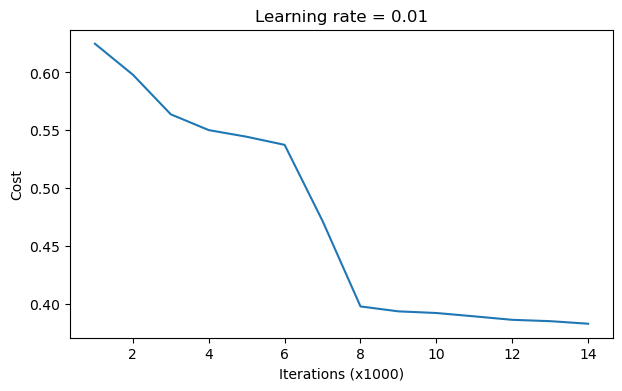

Evaluating on the train set:
Accuracy: 0.83
Evaluating on the test set:
Accuracy: 0.86


In [17]:
# Train the model with random initialization
parameters = model(train_X, train_Y, initialization="random")

# Evaluate model performance on the training set
print("Evaluating on the train set:")
predictions_train = predict(train_X, train_Y, parameters)

# Evaluate model performance on the test set
print("Evaluating on the test set:")
predictions_test = predict(test_X, test_Y, parameters)


In [18]:
# Print predictions for the training set
print("Training set predictions:")
print(predictions_train)

# Print predictions for the test set
print("Test set predictions:")
print(predictions_test)


Training set predictions:
[[1 0 1 1 0 0 1 1 1 1 1 0 1 0 0 1 0 1 1 0 0 0 1 0 1 1 1 1 1 1 0 1 1 0 0 1
  1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1 0 1 0 1 1 1 1 0
  0 0 0 0 1 0 1 0 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 0 1 1 0 1 1 0
  1 0 1 1 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0
  0 0 1 0 1 0 1 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 0 1 1 0 1 0 1 1 1 1 0 1 1 1
  1 0 1 0 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 0 1 1 1 0 1 1 1 0 1 0 1 0 0 1
  0 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1 1 1 0 1 0 0 1 1 0 1 1 1 0 0 0 1 1 0 1 1
  1 1 0 1 1 0 1 1 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 0 0 1 1 1
  1 1 1 1 0 0 0 1 1 1 1 0]]
Test set predictions:
[[1 1 1 1 0 1 0 1 1 0 1 1 1 0 0 0 0 1 0 1 0 0 1 0 1 0 1 1 1 1 1 0 0 0 0 1
  0 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0
  1 1 1 1 1 0 1 0 0 1 0 0 0 1 1 0 1 1 0 0 0 1 1 0 1 1 0 0]]


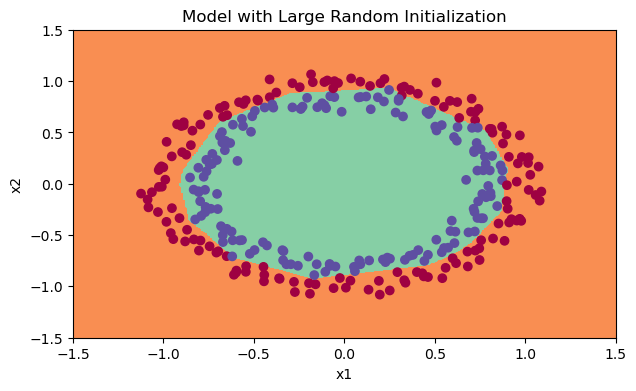

In [44]:
# Set up the plot with a title
plt.title("Model with Large Random Initialization")

# Get current axes
axes = plt.gca()

# Configure axis limits
axes.set_xlim(-1.5, 1.5)
axes.set_ylim(-1.5, 1.5)

# Plot the decision boundary
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)


# 4 - He initialization

In [21]:
import numpy as np

def initialize_parameters_he(layers_dims):
    """
    Initializes parameters using He initialization for deep neural networks.
    
    Arguments:
    layers_dims -- list containing the size of each layer in the network.
    
    Returns:
    parameters -- dictionary containing the initialized parameters "W1", "b1", ..., "WL", "bL":
                    W1 -- weight matrix of shape (layers_dims[l], layers_dims[l-1])
                    b1 -- bias vector of shape (layers_dims[l], 1)
    """
    
    np.random.seed(3)  # Ensures reproducibility of random initialization
    parameters = {}
    L = len(layers_dims)  # Number of layers in the network (including input layer)

    for l in range(1, L):
        # He initialization for weights (scales by sqrt(2 / previous layer size))
        parameters[f'W{l}'] = np.random.randn(layers_dims[l], layers_dims[l-1]) * np.sqrt(2. / layers_dims[l-1])
        
        # Initialize biases to zeros (no scaling needed for now)
        parameters[f'b{l}'] = np.zeros((layers_dims[l], 1))
        
        # Uncomment below if scaling is required for biases
        # parameters[f'b{l}'] = np.zeros((layers_dims[l], 1)) * np.sqrt(2. / layers_dims[l-1])

    return parameters


In [22]:
# Initialize parameters using He initialization for a network with layers of size [2, 4, 1]
parameters = initialize_parameters_he([2, 4, 1])

# Print out the initialized weight and bias matrices
print(f"W1 = {parameters['W1']}")
print(f"b1 = {parameters['b1']}")
print(f"W2 = {parameters['W2']}")
print(f"b2 = {parameters['b2']}")


W1 = [[ 1.78862847  0.43650985]
 [ 0.09649747 -1.8634927 ]
 [-0.2773882  -0.35475898]
 [-0.08274148 -0.62700068]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-0.03098412 -0.33744411 -0.92904268  0.62552248]]
b2 = [[0.]]


Cost after iteration 0: 0.883054
Cost after iteration 1000: 0.687983
Cost after iteration 2000: 0.675129
Cost after iteration 3000: 0.652612
Cost after iteration 4000: 0.608296
Cost after iteration 5000: 0.530494
Cost after iteration 6000: 0.413865
Cost after iteration 7000: 0.311780
Cost after iteration 8000: 0.236962
Cost after iteration 9000: 0.185973
Cost after iteration 10000: 0.150156
Cost after iteration 11000: 0.123251
Cost after iteration 12000: 0.099177
Cost after iteration 13000: 0.084571
Cost after iteration 14000: 0.073579


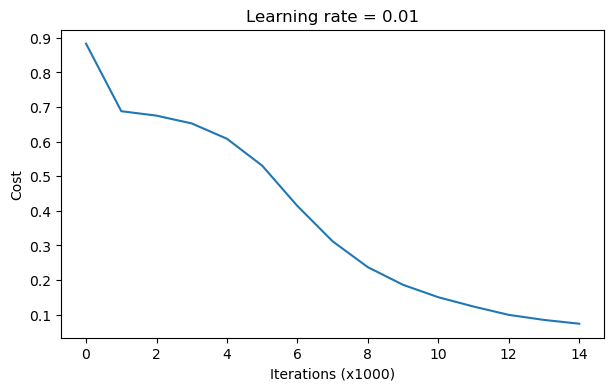

On the train set:
Accuracy: 0.9933333333333333
On the test set:
Accuracy: 0.96


In [23]:
# Train the model using He initialization
parameters = model(train_X, train_Y, initialization="he")

# Evaluate performance on the training set
print("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)

# Evaluate performance on the test set
print("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)


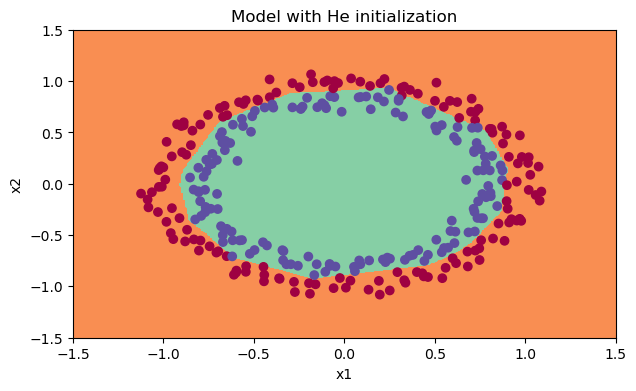

In [24]:
# Set the title for the plot
plt.title("Model with He initialization")

# Get the current axis of the plot
axes = plt.gca()

# Set the x-axis and y-axis limits for the plot
axes.set_xlim([-1.5, 1.5])
axes.set_ylim([-1.5, 1.5])

# Plot the decision boundary based on the model's predictions
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)


## 5 - Conclusions

<table> 
    <tr>
        <th>Model</th>
        <th>Train accuracy</th>
        <th>Problem/Comment</th>
    </tr>
    <tr>
        <td>3-layer NN with zeros initialization</td>
        <td>50%</td>
        <td>fails to break symmetry</td>
    </tr>
    <tr>
        <td>3-layer NN with large random initialization</td>
        <td>83%</td>
        <td>too large weights</td>
    </tr>
    <tr>
        <td>3-layer NN with He initialization</td>
        <td>99%</td>
        <td>recommended method</td>
    </tr>
</table>
